# Los Angeles Bike-Share Trip Analysis

The bike-share Trip Analysis is a project of the mini course Data Analytics by RevoU. The case study requires analytical new three insight from the dataset. The original dataset extract from BigQuery which is Austin Bike-share Trip. Here, I used Los Angeles Bike-share Trip data that retrieve from Kaggle. I utilized Python and Tableau in this case. Tableau used to make dashboard visualization of the insights. 

1) Goals that will be reached: Daily user or Walk-up user will be Membership
2) Analytical Question: How Walk-up user and member use bike share differently?
        sub question: a) Busy hours? Busy Day in a week? Busy Month?
                      b) Growth number of bikeshare user from year to year?
                      c) Top station to start trip and end trip?
                      d) Correlation between passholder_type and trip_route_category & bike_type
                      e) Correlation between day in a week with passholder_type and trip_route_category
3) Recommendation will be in the last.

In [45]:
import pandas as pd
import matplotlib.pyplot as plt 

In [46]:
#Load the dataset

bikeshare = pd.read_csv('datasets/BikeSharing.csv')
station = pd.read_csv('datasets/Stations.csv')

c:\users\hp\appdata\local\programs\python\python39\lib\site-packages\IPython\core\interactiveshell.py:3398: DtypeWarning: Columns (4) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


## Preprocessing data

In [47]:
#Drop some unused columns
bikeshare.drop(['bike_id', 'plan_duration', 'start_lat', 'start_lon', 'end_lat', 'end_lon', 'taxicab_distance'], axis=1, inplace=True)
bikeshare.info()

station.drop(['date_first_active', 'location'], axis=1, inplace=True)
station.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1250835 entries, 0 to 1250834
Data columns (total 9 columns):
 #   Column               Non-Null Count    Dtype 
---  ------               --------------    ----- 
 0   trip_id              1250835 non-null  int64 
 1   duration             1250835 non-null  int64 
 2   start_time           1250835 non-null  object
 3   end_time             1250835 non-null  object
 4   trip_route_category  1250835 non-null  object
 5   passholder_type      1246250 non-null  object
 6   bike_type            1250835 non-null  object
 7   start_station        1250835 non-null  int64 
 8   end_station          1250835 non-null  int64 
dtypes: int64(4), object(5)
memory usage: 85.9+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 348 entries, 0 to 347
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   station_id    348 non-null    int64 
 1   station_name  348 non-null    object
 2  

In [48]:
#check if there are any duplicates in id and drop the row
station.duplicated().any()
station.isnull().any()

station_id      False
station_name    False
status          False
dtype: bool

In [49]:
bikeshare.isnull().any()

trip_id                False
duration               False
start_time             False
end_time               False
trip_route_category    False
passholder_type         True
bike_type              False
start_station          False
end_station            False
dtype: bool

In [53]:
bikeshare['passholder_type'].unique()

array(['Monthly Pass', 'Annual Pass', 'Walk-up', 'One Day Pass',
       'Flex Pass', nan], dtype=object)

### There is a duplicate in bikeshare table

The duplicate is on passholder_type, but it is make sense if there is a duplicate because the type just 5 types and used by so many id. The point is there are no duplicates on id column.

## Merge dataset table

Bikeshare has columns named start_station and end_station in the form of id. Here we will merge bikeshare and station with left_join to subset id station with name of station.

In [56]:
bikeshare_station = bikeshare.merge(station, left_on='start_station', right_on='station_id', how='left')

In [57]:
bikeshare_station.drop(['start_station', 'station_id', 'status'], axis=1, inplace=True)
bikeshare_station

,trip_id,duration,start_time,end_time,trip_route_category,passholder_type,bike_type,end_station,station_name
0,1912818,3,07/07/2016 4:17,07/07/2016 4:20,Round Trip,Monthly Pass,standard,3014,Union Station West Portal
1,1919661,33,07/07/2016 6:00,07/07/2016 6:33,Round Trip,Monthly Pass,standard,3014,Union Station West Portal
2,1933383,5,07/07/2016 10:32,07/07/2016 10:37,Round Trip,Annual Pass,standard,3016,Los Angeles & Temple
3,1940317,7,07/07/2016 12:51,07/07/2016 12:58,Round Trip,Walk-up,standard,3032,Hope & 6th
4,1943980,9,07/07/2016 13:50,07/07/2016 13:59,One Way,Monthly Pass,standard,3030,Main & 9th
...,...,...,...,...,...,...,...,...,...
1250830,172219113,7,9/30/2021 23:41,9/30/2021 23:48,One Way,Walk-up,electric,4315,Figueroa & 9th
1250831,172219114,13,9/30/2021 23:34,9/30/2021 23:47,One Way,Monthly Pass,electric,4248,Broadway & 11th
1250832,172219218,25,9/30/2021 23:26,9/30/2021 23:51,One Way,Monthly Pass,electric,3074,7th & Flower
1250833,172219313,7,9/30/2021 23:50,9/30/2021 23:57,One Way,Walk-up,standard,4578,Main & 1st


In [58]:
bikeshare_station.rename(columns = {'station_name' : 'start_station'}, inplace=True)

In [59]:
bikeshare_station_name = bikeshare_station.merge(station, left_on = 'end_station', right_on = 'station_id', how = 'left')

In [60]:
bikeshare_station_name.drop(['end_station', 'station_id', 'status'], axis=1, inplace=True)
bikeshare_station_name

,trip_id,duration,start_time,end_time,trip_route_category,passholder_type,bike_type,start_station,station_name
0,1912818,3,07/07/2016 4:17,07/07/2016 4:20,Round Trip,Monthly Pass,standard,Union Station West Portal,Union Station West Portal
1,1919661,33,07/07/2016 6:00,07/07/2016 6:33,Round Trip,Monthly Pass,standard,Union Station West Portal,Union Station West Portal
2,1933383,5,07/07/2016 10:32,07/07/2016 10:37,Round Trip,Annual Pass,standard,Los Angeles & Temple,Los Angeles & Temple
3,1940317,7,07/07/2016 12:51,07/07/2016 12:58,Round Trip,Walk-up,standard,Hope & 6th,Hope & 6th
4,1943980,9,07/07/2016 13:50,07/07/2016 13:59,One Way,Monthly Pass,standard,Main & 9th,Main & 1st
...,...,...,...,...,...,...,...,...,...
1250830,172219113,7,9/30/2021 23:41,9/30/2021 23:48,One Way,Walk-up,electric,Figueroa & 9th,Union & 7th
1250831,172219114,13,9/30/2021 23:34,9/30/2021 23:47,One Way,Monthly Pass,electric,Broadway & 11th,29th & Ellendale
1250832,172219218,25,9/30/2021 23:26,9/30/2021 23:51,One Way,Monthly Pass,electric,7th & Flower,Hope & Olympic
1250833,172219313,7,9/30/2021 23:50,9/30/2021 23:57,One Way,Walk-up,standard,Main & 1st,Main & 8th


In [61]:
bikeshare_station_name.rename(columns={'station_name' : 'end_station'}, inplace=True)
bikeshare_station_name

,trip_id,duration,start_time,end_time,trip_route_category,passholder_type,bike_type,start_station,end_station
0,1912818,3,07/07/2016 4:17,07/07/2016 4:20,Round Trip,Monthly Pass,standard,Union Station West Portal,Union Station West Portal
1,1919661,33,07/07/2016 6:00,07/07/2016 6:33,Round Trip,Monthly Pass,standard,Union Station West Portal,Union Station West Portal
2,1933383,5,07/07/2016 10:32,07/07/2016 10:37,Round Trip,Annual Pass,standard,Los Angeles & Temple,Los Angeles & Temple
3,1940317,7,07/07/2016 12:51,07/07/2016 12:58,Round Trip,Walk-up,standard,Hope & 6th,Hope & 6th
4,1943980,9,07/07/2016 13:50,07/07/2016 13:59,One Way,Monthly Pass,standard,Main & 9th,Main & 1st
...,...,...,...,...,...,...,...,...,...
1250830,172219113,7,9/30/2021 23:41,9/30/2021 23:48,One Way,Walk-up,electric,Figueroa & 9th,Union & 7th
1250831,172219114,13,9/30/2021 23:34,9/30/2021 23:47,One Way,Monthly Pass,electric,Broadway & 11th,29th & Ellendale
1250832,172219218,25,9/30/2021 23:26,9/30/2021 23:51,One Way,Monthly Pass,electric,7th & Flower,Hope & Olympic
1250833,172219313,7,9/30/2021 23:50,9/30/2021 23:57,One Way,Walk-up,standard,Main & 1st,Main & 8th


### Ensure the datatypes of all columns were correct

Below, the start_time and end_time not in Datetime datatype. It will be difficult for us to process the data. So, we will change the datatype into datetime first.

In [62]:
bikeshare.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1250835 entries, 0 to 1250834
Data columns (total 9 columns):
 #   Column               Non-Null Count    Dtype 
---  ------               --------------    ----- 
 0   trip_id              1250835 non-null  int64 
 1   duration             1250835 non-null  int64 
 2   start_time           1250835 non-null  object
 3   end_time             1250835 non-null  object
 4   trip_route_category  1250835 non-null  object
 5   passholder_type      1246250 non-null  object
 6   bike_type            1250835 non-null  object
 7   start_station        1250835 non-null  int64 
 8   end_station          1250835 non-null  int64 
dtypes: int64(4), object(5)
memory usage: 85.9+ MB


In [63]:
bikeshare_station_name['time_start'] = pd.to_datetime(bikeshare_station_name['start_time'])
bikeshare_station_name['time_end'] = pd.to_datetime(bikeshare_station_name['end_time'])

In [64]:
bikeshare_station_name.drop(['start_time', 'end_time'], axis=1, inplace=True)

In [65]:
bikeshare_station_name['time_0'] = bikeshare_station_name['time_start'].dt.time
bikeshare_station_name['time_1'] = bikeshare_station_name['time_end'].dt.time

In [66]:
#split time_start column into year, month, and time column
#I only choose start time for retrieve year and month because it must be same day when the trip start until the end.

bikeshare_station_name.drop(['time_end'], axis=1, inplace=True)
bikeshare_station_name['year'] = bikeshare_station_name['time_start'].dt.year
bikeshare_station_name['month'] = bikeshare_station_name['time_start'].dt.month
bikeshare_station_name

,trip_id,duration,trip_route_category,passholder_type,bike_type,start_station,end_station,time_start,time_0,time_1,year,month
0,1912818,3,Round Trip,Monthly Pass,standard,Union Station West Portal,Union Station West Portal,2016-07-07 04:17:00,04:17:00,04:20:00,2016,7
1,1919661,33,Round Trip,Monthly Pass,standard,Union Station West Portal,Union Station West Portal,2016-07-07 06:00:00,06:00:00,06:33:00,2016,7
2,1933383,5,Round Trip,Annual Pass,standard,Los Angeles & Temple,Los Angeles & Temple,2016-07-07 10:32:00,10:32:00,10:37:00,2016,7
3,1940317,7,Round Trip,Walk-up,standard,Hope & 6th,Hope & 6th,2016-07-07 12:51:00,12:51:00,12:58:00,2016,7
4,1943980,9,One Way,Monthly Pass,standard,Main & 9th,Main & 1st,2016-07-07 13:50:00,13:50:00,13:59:00,2016,7
...,...,...,...,...,...,...,...,...,...,...,...,...
1250830,172219113,7,One Way,Walk-up,electric,Figueroa & 9th,Union & 7th,2021-09-30 23:41:00,23:41:00,23:48:00,2021,9
1250831,172219114,13,One Way,Monthly Pass,electric,Broadway & 11th,29th & Ellendale,2021-09-30 23:34:00,23:34:00,23:47:00,2021,9
1250832,172219218,25,One Way,Monthly Pass,electric,7th & Flower,Hope & Olympic,2021-09-30 23:26:00,23:26:00,23:51:00,2021,9
1250833,172219313,7,One Way,Walk-up,standard,Main & 1st,Main & 8th,2021-09-30 23:50:00,23:50:00,23:57:00,2021,9


In [67]:
#Rename value of month into string of month

bikeshare_station_name['month'].replace({1:'January', 2:'February', 3:'March', 4:'April', 5:'May', 6:'June', 7:'July', 8:'August', 9:'September', 10:'October', 11:'November', 12:'December'}, inplace=True)
bikeshare_station_name

,trip_id,duration,trip_route_category,passholder_type,bike_type,start_station,end_station,time_start,time_0,time_1,year,month
0,1912818,3,Round Trip,Monthly Pass,standard,Union Station West Portal,Union Station West Portal,2016-07-07 04:17:00,04:17:00,04:20:00,2016,July
1,1919661,33,Round Trip,Monthly Pass,standard,Union Station West Portal,Union Station West Portal,2016-07-07 06:00:00,06:00:00,06:33:00,2016,July
2,1933383,5,Round Trip,Annual Pass,standard,Los Angeles & Temple,Los Angeles & Temple,2016-07-07 10:32:00,10:32:00,10:37:00,2016,July
3,1940317,7,Round Trip,Walk-up,standard,Hope & 6th,Hope & 6th,2016-07-07 12:51:00,12:51:00,12:58:00,2016,July
4,1943980,9,One Way,Monthly Pass,standard,Main & 9th,Main & 1st,2016-07-07 13:50:00,13:50:00,13:59:00,2016,July
...,...,...,...,...,...,...,...,...,...,...,...,...
1250830,172219113,7,One Way,Walk-up,electric,Figueroa & 9th,Union & 7th,2021-09-30 23:41:00,23:41:00,23:48:00,2021,September
1250831,172219114,13,One Way,Monthly Pass,electric,Broadway & 11th,29th & Ellendale,2021-09-30 23:34:00,23:34:00,23:47:00,2021,September
1250832,172219218,25,One Way,Monthly Pass,electric,7th & Flower,Hope & Olympic,2021-09-30 23:26:00,23:26:00,23:51:00,2021,September
1250833,172219313,7,One Way,Walk-up,standard,Main & 1st,Main & 8th,2021-09-30 23:50:00,23:50:00,23:57:00,2021,September


In [68]:
#Retrieve the day name of the date

bikeshare_station_name['dayOfWeek'] = bikeshare_station_name['time_start'].dt.day_name()
bikeshare_station_name

,trip_id,duration,trip_route_category,passholder_type,bike_type,start_station,end_station,time_start,time_0,time_1,year,month,dayOfWeek
0,1912818,3,Round Trip,Monthly Pass,standard,Union Station West Portal,Union Station West Portal,2016-07-07 04:17:00,04:17:00,04:20:00,2016,July,Thursday
1,1919661,33,Round Trip,Monthly Pass,standard,Union Station West Portal,Union Station West Portal,2016-07-07 06:00:00,06:00:00,06:33:00,2016,July,Thursday
2,1933383,5,Round Trip,Annual Pass,standard,Los Angeles & Temple,Los Angeles & Temple,2016-07-07 10:32:00,10:32:00,10:37:00,2016,July,Thursday
3,1940317,7,Round Trip,Walk-up,standard,Hope & 6th,Hope & 6th,2016-07-07 12:51:00,12:51:00,12:58:00,2016,July,Thursday
4,1943980,9,One Way,Monthly Pass,standard,Main & 9th,Main & 1st,2016-07-07 13:50:00,13:50:00,13:59:00,2016,July,Thursday
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1250830,172219113,7,One Way,Walk-up,electric,Figueroa & 9th,Union & 7th,2021-09-30 23:41:00,23:41:00,23:48:00,2021,September,Thursday
1250831,172219114,13,One Way,Monthly Pass,electric,Broadway & 11th,29th & Ellendale,2021-09-30 23:34:00,23:34:00,23:47:00,2021,September,Thursday
1250832,172219218,25,One Way,Monthly Pass,electric,7th & Flower,Hope & Olympic,2021-09-30 23:26:00,23:26:00,23:51:00,2021,September,Thursday
1250833,172219313,7,One Way,Walk-up,standard,Main & 1st,Main & 8th,2021-09-30 23:50:00,23:50:00,23:57:00,2021,September,Thursday


## Make a time series of bikeshare trip by year

This time series will show us how the development of bikeshare year by year and we can relate to what happening in that year. From that we can analyze why the trip was going down or up.

Based on the graph, we can see that users bike-share were going down from 2019 until became more decrease in pandemic 2020. It is because most people did work from home without any trip to their office.

<AxesSubplot:title={'center':'Time series of bike share trip by year'}, xlabel='year'>

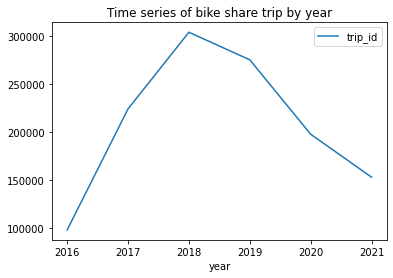

In [90]:
bikeshare_by_year = bikeshare_station_name.groupby('year').agg({'trip_id':'count'})
bikeshare_by_year.plot(kind='line', title='Time series of bike share trip by year')

## Make bar plot of bikeshare trip by month, day, and time, then rank the station

This graph will show us the busy time of the trip. So, we can make a campaign in spesific time.

### Insights
1) The highest rent of bike happens in August which is a summer holiday. The increase has occured since July, still growth up in august and then going down in September. From that insight, we can utilize that moment to make a large campaign for summer holiday.
2) In a week, the average is almost similar, but the highest is on Friday. It will looks more detail when we compare with passholder_type. So, we will see what's the dominant in weekday and weekend.
3) The busy time is happens at 16.00 until 18.00, the highest rent is at 17.00. It makes sense because at that time, most people were going to home from work. We can utilize this moment to make a promote.
4) The top station that be start station and end station is 7th & flower. 

In [71]:
month = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

<AxesSubplot:title={'center':'Trip bike share by month in a year'}, xlabel='month'>

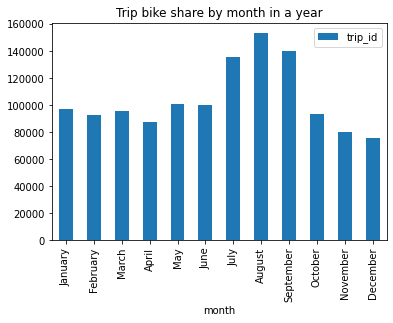

In [89]:
bikeshare_by_month = bikeshare_station_name.groupby('month').agg({'trip_id':'count'}).reindex(month)
bikeshare_by_month.plot(kind='bar', title='Trip bike share by month in a year')

<AxesSubplot:title={'center':'Trip bike share by day in a week'}, xlabel='dayOfWeek'>

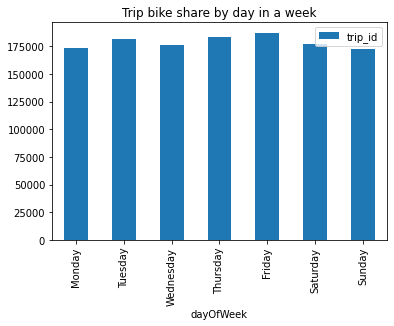

In [87]:
days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
bikeshare_by_day = bikeshare_station_name.groupby('dayOfWeek').agg({'trip_id':'count'}).reindex(days)
bikeshare_by_day.plot(kind='bar', title='Trip bike share by day in a week')

<AxesSubplot:title={'center':'Trip bike share by time in a day'}, xlabel='time_start'>

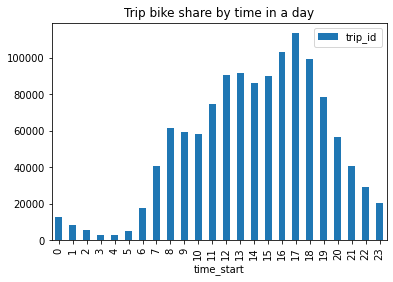

In [88]:
bikeshare_by_hour = bikeshare_station_name.groupby(bikeshare_station_name['time_start'].dt.hour).agg({'trip_id':'count'})
bikeshare_by_hour.plot(kind='bar', title='Trip bike share by time in a day')

In [75]:
start_station_bs = bikeshare_station_name.groupby('start_station').agg({'trip_id':'count'})
end_station_bs = bikeshare_station_name.groupby('end_station').agg({'trip_id':'count'})
start_station_bs.sort_values(by='trip_id', ascending=False).head(5)

,trip_id
start_station,
7th & Flower,51443
Main & 1st,38390
Ocean Front Walk & Navy,37059
Union Station West Portal,34973
7th & Spring,31809


In [76]:
end_station_bs.nlargest(5, 'trip_id')

,trip_id
end_station,
7th & Flower,56540
Union Station West Portal,39301
7th & Spring,34956
Ocean Front Walk & Navy,34123
Main & 1st,33226


## Find some correlation between several columns

In this case, we will make a some correlation between several category.
1) Correlation between placeholder_type and type_route_category.
From that correlation we can look that placeholder_type has a correlation for people to choose their type_route_category or not.
2) Correlation between placeholder_type and bike_type.
From that we can see the impact of placeholder_type for people to choose their bike_type when they rent a bike share.
3) Correlation between day and placeholder_type.
This correlation is used to see the busy day was dominant by member or not and in what day there will be dominant by non-member.
4) Correlation between day and type_route_category.
It will used to look at the highest type_route_category in busy day

In [77]:
bikeshare_station_name['trip_route_category'].unique()

array(['Round Trip', 'One Way', 'One Day Pa', 'Annual Pas', 'Walk-up',
       'Monthly Pa'], dtype=object)

In [78]:
pass_trip_horiz = bikeshare_station_name.groupby(['passholder_type', 'trip_route_category']).agg({'trip_id' : 'count'}) 
pass_trip = pass_trip_horiz.pivot_table(index='passholder_type', columns='trip_route_category', values='trip_id')
pass_trip

trip_route_category,Annual Pas,Monthly Pa,One Day Pa,One Way,Round Trip,Walk-up
passholder_type,,,,,,
Annual Pass,4526.0,NaN,NaN,71416.0,4939.0,NaN
Flex Pass,NaN,NaN,NaN,300.0,14.0,NaN
Monthly Pass,NaN,26402.0,NaN,636332.0,60438.0,NaN
One Day Pass,NaN,NaN,7192.0,42656.0,17795.0,NaN
Walk-up,NaN,NaN,NaN,244705.0,110773.0,18762.0


In [79]:
#drop null value

pass_trip.drop(['One Day Pa', 'Annual Pas', 'Walk-up', 'Monthly Pa'], axis=1, inplace=True)
pass_trip

trip_route_category,One Way,Round Trip
passholder_type,,
Annual Pass,71416.0,4939.0
Flex Pass,300.0,14.0
Monthly Pass,636332.0,60438.0
One Day Pass,42656.0,17795.0
Walk-up,244705.0,110773.0


<AxesSubplot:title={'center':'Trip_route_category by passholder_type'}, xlabel='passholder_type'>

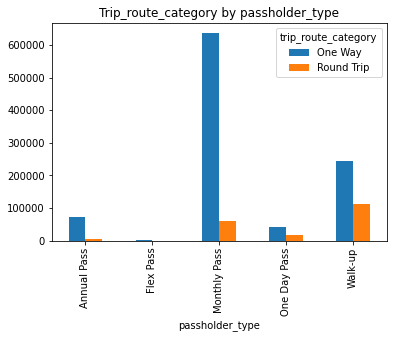

In [91]:
pass_trip.plot(kind='bar', title='Trip_route_category by passholder_type')

In [92]:
pass_bike = bikeshare_station_name.groupby(['passholder_type', 'bike_type']).agg({'trip_id':'count'})
pass_bike_wide = pass_bike.pivot_table(index = 'passholder_type', columns='bike_type', values='trip_id')
pass_bike_wide

bike_type,electric,smart,standard,standard/smart
passholder_type,,,,
Annual Pass,17468,2113,60114,1186
Flex Pass,2,3,307,2
Monthly Pass,165729,13688,534245,9510
One Day Pass,8447,6487,46118,6591
Walk-up,22014,19029,316103,17094


<AxesSubplot:title={'center':'bike_type by passholder_type'}, xlabel='passholder_type'>

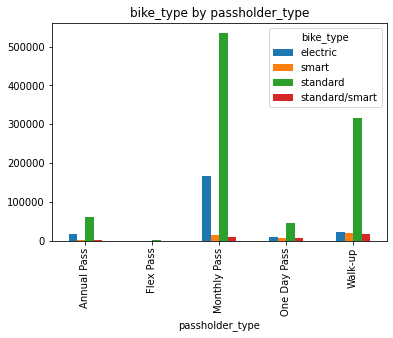

In [93]:
pass_bike_wide.plot(kind='bar', title='bike_type by passholder_type')

In [94]:
day_pass = bikeshare_station_name.groupby(['dayOfWeek', 'passholder_type']).agg({'trip_id':'count'})
day_pass_wide = day_pass.pivot_table(index='dayOfWeek', columns='passholder_type', values='trip_id').reindex(days)
day_pass_wide

passholder_type,Annual Pass,Flex Pass,Monthly Pass,One Day Pass,Walk-up
dayOfWeek,,,,,
Monday,11564,53,106188,8646,46249
Tuesday,12573,53,114840,7244,46250
Wednesday,12468,29,113390,6773,42524
Thursday,12538,57,114327,8618,46993
Friday,12784,52,110933,9239,53503
Saturday,9730,38,82562,14103,69829
Sunday,9224,32,80932,13020,68892


<AxesSubplot:title={'center':'placeholder_type by day'}, xlabel='dayOfWeek'>

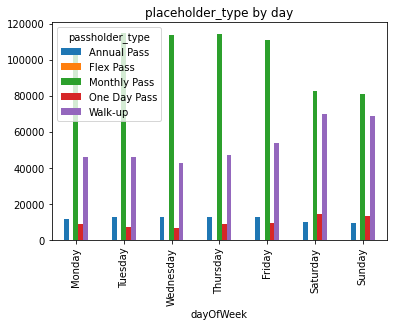

In [95]:
day_pass_wide.plot(kind='bar', title='placeholder_type by day')

In [96]:
day_route = bikeshare_station_name.groupby(['dayOfWeek', 'trip_route_category']).agg({'trip_id' : 'count'})
day_route_wide = day_route.pivot_table(index='dayOfWeek', columns='trip_route_category', values='trip_id').reindex(days)
day_route_wide

trip_route_category,Annual Pas,Monthly Pa,One Day Pa,One Way,Round Trip,Walk-up
dayOfWeek,,,,,,
Monday,573,3500,758,141054,25265,2125
Tuesday,762,4097,675,149215,24935,2038
Wednesday,659,3762,750,145177,23515,1974
Thursday,668,3824,901,149927,25647,2161
Friday,730,3909,937,151815,27011,2659
Saturday,620,3620,1713,133433,33603,4025
Sunday,514,3690,1458,128524,34832,3780


<AxesSubplot:title={'center':'trip_route_category by day'}, xlabel='dayOfWeek'>

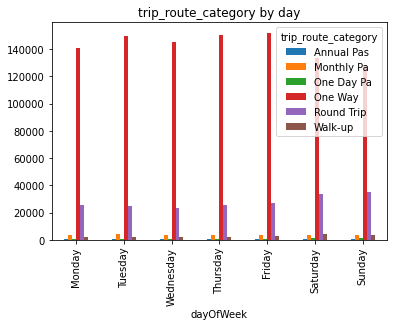

In [97]:
day_route_wide.plot(kind='bar', title='trip_route_category by day')

### Insights

Based on correlation plot above, we got several insight.
1) The highest route_type of member is One Way Route, but for the Round trip, it has highest rent by walk-up user. This because walk-up user usually rent bike share for spend their holiday, so they just have trip to round the city.
2) Most people both member and not, use the standard bike .
3) In weekday, the rent of bike share is dominant by member with monthly pass. But at the weekend, the rent of non-member was going up and the rent of member was going down. 
4) Most user use the one way route, both member and not.

## RECOMMENDATION

1. Promote that membership can save money on regular trips and travel longer
2. Make a large campaign for summer holiday
3. Target the costumer in weekend that can be combine with promotion of round-trip, it is related to poin number 1
4. Target the costumer in busy time arround 16-18 p.m.